In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [44]:
df=pd.read_csv('StudentsPerformance.csv')
dir_name = "../rawdata"
if os.path.isdir(dir_name)==False:
    os.mkdir("../rawdata")
filename = "raw_csv.csv"
full_name = os.path.join(dir_name , filename)
df.to_csv(full_name, sep=',')
readme_file_name = os.path.join(dir_name,'readme.txt')
with open(readme_file_name, "a") as f:
    f.write('Create a new text!\n')
f.close()

In [45]:
df = pd.read_csv(full_name)
df

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88,99,95
996,996,male,group C,high school,free/reduced,none,62,55,55
997,997,female,group C,high school,free/reduced,completed,59,71,65
998,998,female,group D,some college,standard,completed,68,78,77


In [46]:
dir_name = "../cleandata"
if os.path.isdir(dir_name)==False:
    os.mkdir("../cleandata")
filename = "new_data.csv"
full_name = os.path.join(dir_name , filename)
df.to_csv(full_name, sep=',')
f.close()

In [47]:
dir_name = "../result"
if os.path.isdir(dir_name)==False:
    os.mkdir("../result")
full_name = os.path.join(dir_name)
f.close()

In [48]:
df.shape

(1000, 9)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test preparation course      1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [50]:
clean_df = df.fillna(value = 0,inplace = False)
clean_df.to_csv("../cleandata/new_data.csv")

In [51]:
df.duplicated().sum()

0

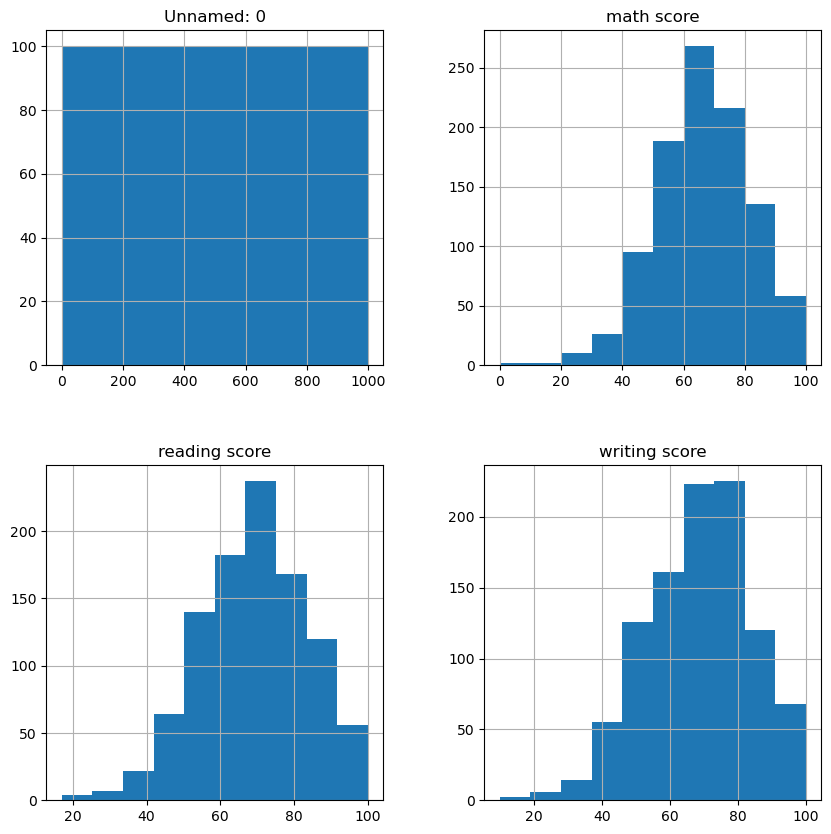

In [62]:
df.hist(figsize=(10,10));
plt.savefig("../result/hist.jpg")

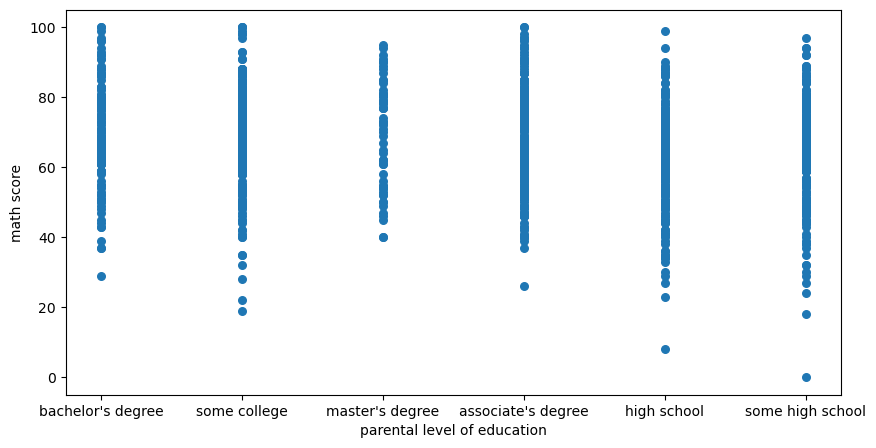

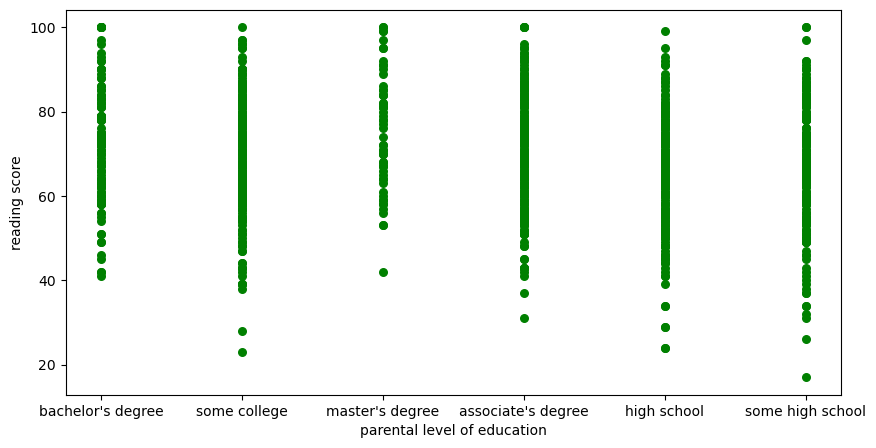

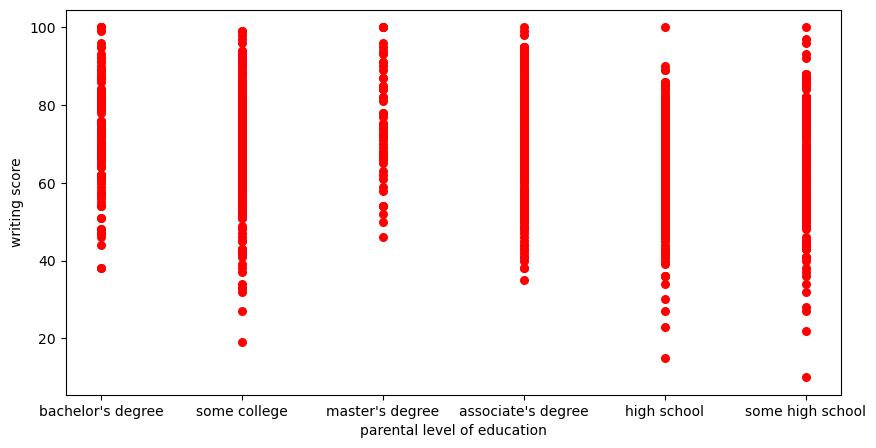

In [63]:
df.plot.scatter(x = 'parental level of education', y = 'math score', s = 30, figsize=(10,5));
plt.savefig("../result/scatterplot1.png")
df.plot.scatter(x = 'parental level of education', y = 'reading score', color='g',s=30, figsize=(10,5));
plt.savefig("../result/scatterplot2.png")
df.plot.scatter(x = 'parental level of education', y = 'writing score', color='r',s=30, figsize=(10,5));
plt.savefig("../result/scatterplot3.png")

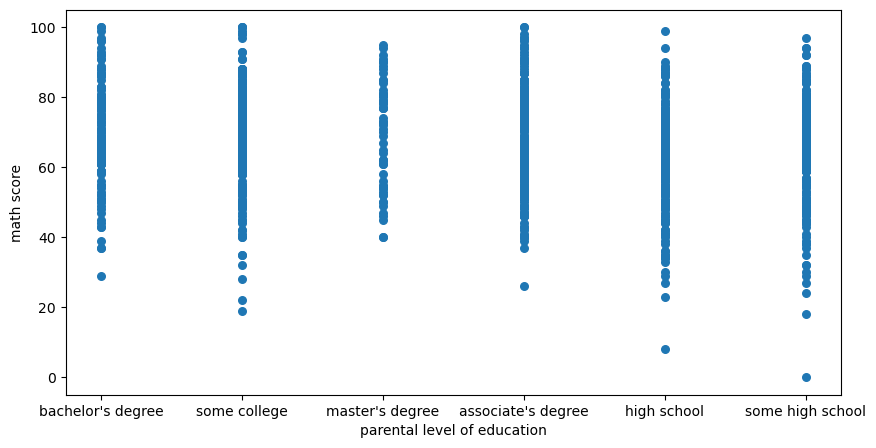

In [64]:
df.plot.scatter(x = 'parental level of education', y = 'math score', s = 30, figsize=(10,5));

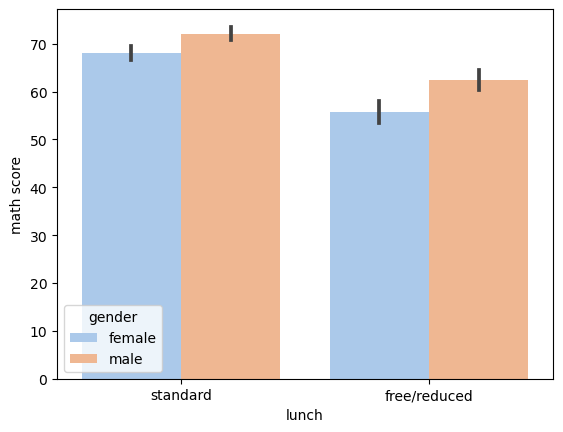

In [65]:
sns.barplot(x = 'lunch', y = 'math score', hue='gender', data = df, palette='pastel')
plt.savefig("../result/snsbar.png")  

C:\Users\Nuzat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nuzat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nuzat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


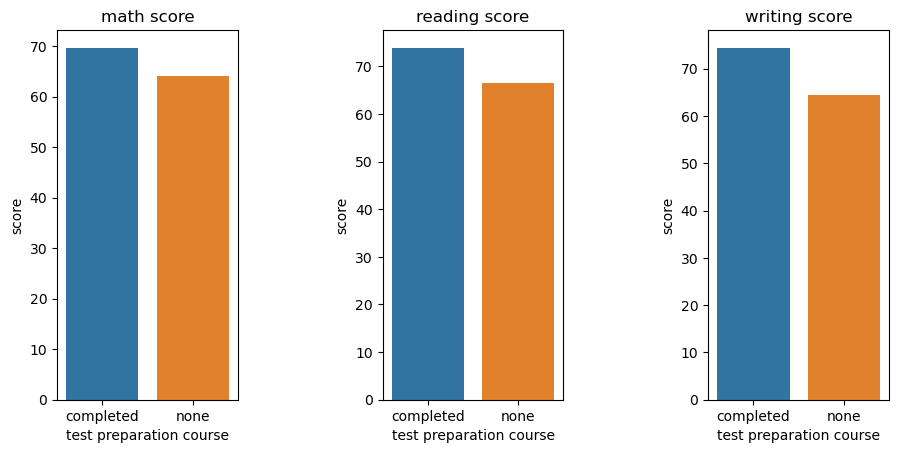

In [66]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("test preparation course")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])


plt.savefig("../result/bargraph1.jpg")    
plt.show()

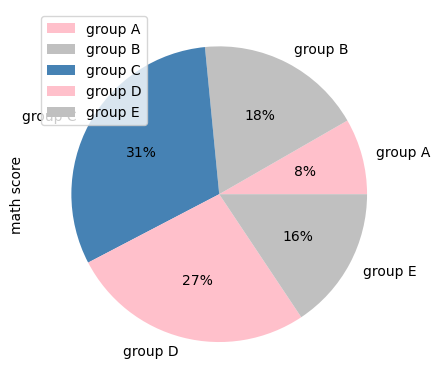

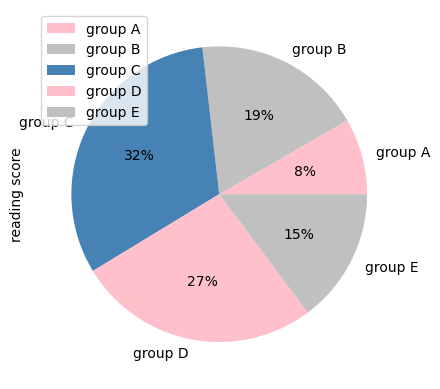

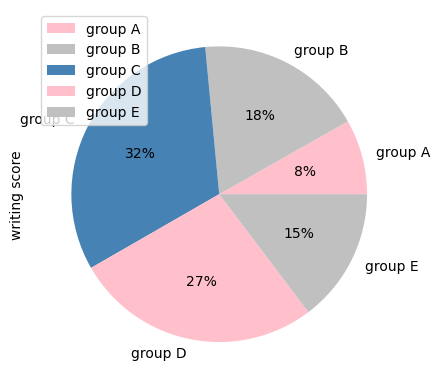

In [67]:
colors = ['pink', 'silver', 'steelblue']
df.groupby(['race/ethnicity']).sum().plot(kind='pie', y='math score',autopct='%1.0f%%',colors=colors)
plt.savefig("../result/piechart1.png")   
df.groupby(['race/ethnicity']).sum().plot(kind='pie', y='reading score',autopct='%1.0f%%',colors=colors)
plt.savefig("../result/piechart2.png")   
df.groupby(['race/ethnicity']).sum().plot(kind='pie', y='writing score',autopct='%1.0f%%',colors=colors)
plt.savefig("../result/piechart3.png")   